# Loading libraries

In [15]:
# Loading the libraries

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import pandas as pd
import psycopg2 as psg
import geopandas as gpd

# Data formation

In [16]:
c2015= pd.read_csv(r"D:\Harsh\SIG\SEM 2\Mini Project ML and Python\Criminal-Activity-Hotspots-master\data\crimes_2015.csv")
c2015.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10460641,HZ199559,12/31/2015 11:59:00 PM,015XX N KEDZIE AVE,0890,THEFT,FROM BUILDING,RESIDENCE PORCH/HALLWAY,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.642993,"(41.757366519, -87.642992854)",17.0,21554.0,66.0,511.0,32.0,59.0,20.0,229.0
2,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,-87.585822,"(41.751270452, -87.585822373)",9.0,21202.0,41.0,431.0,35.0,25.0,19.0,224.0
3,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,-87.690709,"(42.016804165, -87.690708662)",42.0,22528.0,20.0,359.0,27.0,12.0,11.0,35.0
4,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,-87.658635,"(41.949837364, -87.658635101)",38.0,21186.0,57.0,691.0,25.0,53.0,5.0,12.0


In [17]:
# To get the data from all the files at one place
import sys
sys.path.append(r"D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils")
import util_script as us
paths= "D:\\Harsh\\SIG\\SEM 2\\Mini Project ML and Python\\Criminal-Activity-Hotspots-master\\data\\"

file_names = ['crimes_2015.csv','crimes_2016.csv','crimes_2017.csv','crimes_2018.csv','crimes_2019.csv']
file_names = [paths+x for x in file_names]

main_data = us.create_df(file_names)
shape = main_data.shape
print("The Number of Crimes: "+ str(main_data.shape[0]))
print("\nThe Number of Columns: "+ str(main_data.shape[1]))

Finished Loading Chicago Crime Dataset File for the year 2015.
Finished loading Chicago Crime Dataset file for the year 2016.


D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils\util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2017.


D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils\util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2018.


D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils\util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2019.
All data files loaded onto the Main Dataframe.


The Number of Crimes: 1146382

The Number of Columns: 22


D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils\util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


# Preprocessing

In [18]:
# Information about the main dataframe
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146382 entries, 0 to 1146381
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1146382 non-null  int64  
 1   Case Number           1146382 non-null  object 
 2   Date                  1146382 non-null  object 
 3   Block                 1146382 non-null  object 
 4   IUCR                  1146382 non-null  object 
 5   Primary Type          1146382 non-null  object 
 6   Description           1146382 non-null  object 
 7   Location Description  1142740 non-null  object 
 8   Arrest                1146382 non-null  bool   
 9   Domestic              1146382 non-null  bool   
 10  Beat                  1146382 non-null  int64  
 11  District              1146381 non-null  float64
 12  Ward                  1146373 non-null  float64
 13  Community Area        1146380 non-null  float64
 14  FBI Code              1146382 non-

In [19]:
# Missing Values
main_data.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3642
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                        9
Community Area              2
FBI Code                    0
X Coordinate            13983
Y Coordinate            13983
Year                        0
Updated On                  0
Latitude                13983
Longitude               13983
Location                13983
dtype: int64

In [20]:
# To drop the rows with missing data
main_data = main_data.dropna()
main_data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [21]:
main_data.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17.0,68.0,14,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)"
2,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,8.0,45.0,04B,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)"
3,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,50.0,2.0,06,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)"
4,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,44.0,6.0,08B,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)"
5,10365142,HZ100722,12/31/2015 11:45:00 PM,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
6,10365005,HZ100487,12/31/2015 11:45:00 PM,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
7,10366580,HZ102701,12/31/2015 11:45:00 PM,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,37.0,25.0,14,1142595.0,1910502.0,2015,02/10/2018 03:50:01 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)"
8,10364809,HZ100034,12/31/2015 11:42:00 PM,004XX E RANDOLPH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,42.0,32.0,26,1179325.0,1901333.0,2015,02/10/2018 03:50:01 PM,41.884547,-87.616947,"(41.884546689, -87.616947314)"
9,10364668,HY556628,12/31/2015 11:41:00 PM,048XX S JUSTINE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,True,...,20.0,61.0,26,1166823.0,1872564.0,2015,02/10/2018 03:50:01 PM,41.805879,-87.663680,"(41.805879049, -87.663679798)"
10,10364943,HZ100396,12/31/2015 11:30:00 PM,003XX W 25TH PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,11.0,34.0,14,1174442.0,1887387.0,2015,02/10/2018 03:50:01 PM,41.846388,-87.635295,"(41.846388365, -87.635294564)"


In [22]:
print(main_data.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [23]:
main_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [24]:
# Function to Clean the 'Date' variable 

def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [25]:
# Using apply() of pandas to apply time_convert on every row of the Date column
main_data['Date'] = main_data['Date'].apply(time_convert)

In [26]:
# Splitting the 'Date' variable into more suitable variables for a Time-based analysis

# Month
def month_col(x):
    return int(x.strftime("%m"))
main_data['Month'] = main_data['Date'].apply(month_col)

# Day
def day_col(x):
    return int(x.strftime("%w"))
main_data['Day'] = main_data['Date'].apply(day_col)  

# Hour
def hour_col(x):
    return int(x.strftime("%H"))
main_data['Hour'] = main_data['Date'].apply(hour_col)

In [27]:
main_data['Date'].head()

1   2015-12-31 23:59:00
2   2015-12-31 23:55:00
3   2015-12-31 23:50:00
4   2015-12-31 23:50:00
5   2015-12-31 23:45:00
Name: Date, dtype: datetime64[ns]

In [28]:
# Filtering the Top 10 most occuring crimes in the city of Chicago 

top_10 = list(main_data['Primary Type'].value_counts().head(10).index)
top_10

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'ASSAULT',
 'OTHER OFFENSE',
 'DECEPTIVE PRACTICE',
 'NARCOTICS',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'ROBBERY']

In [29]:
# Creating the dataframe with all the data of only the top 10 crimes

def filter_top_10(df):
    df2=df[df['Primary Type']=='THEFT']
    for crime in top_10[1:]:
        temp=df[df['Primary Type']==crime]
        df2 = df2.append(temp, ignore_index=True)
    return df2
    
data_top_10=filter_top_10(main_data) 
data_top_10.shape

C:\Users\harsh\AppData\Local\Temp\ipykernel_10536\534351760.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp, ignore_index=True)


(1036588, 25)

In [30]:
1036588/1146382 * 100

# Even though only the Top 10 crimes have been picked up from the whole dataset, we see that we still have been able to retain 90.4% of all crime records. 

90.42256420634658

In [31]:
data_top_10.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",12,4,23
1,10365142,HZ100722,2015-12-31 23:45:00,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23
2,10365005,HZ100487,2015-12-31 23:45:00,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23
3,10364834,HZ100276,2015-12-31 23:30:00,015XX S MORGAN ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,1170163.0,1892555.0,2015,01/07/2016 04:14:34 PM,41.860664,-87.650847,"(41.860664155, -87.650847428)",12,4,23
4,10365158,HZ100762,2015-12-31 23:30:00,035XX N SOUTHPORT AVE,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1166346.0,1923429.0,2015,02/10/2018 03:50:01 PM,41.945467,-87.663974,"(41.945466899, -87.663974392)",12,4,23


In [108]:
label=data_top_10["Primary Type"].value_counts().index
sizes=data_top_10["Primary Type"].value_counts().values

Text(0.5, 1.0, 'Primary Type of the Crime')

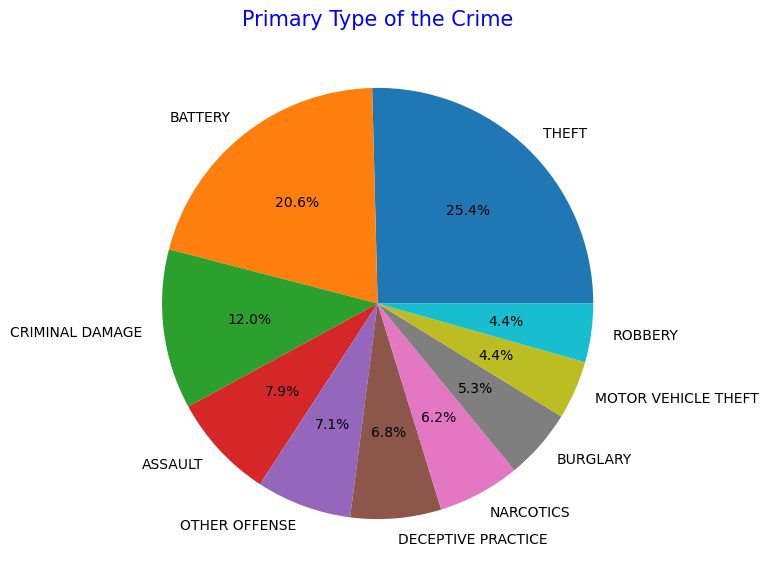

In [113]:
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=label, autopct='%1.1f%%')
plt.title('Primary Type of the Crime',color = 'blue',fontsize = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'THEFT'),
  Text(1, 0, 'BATTERY'),
  Text(2, 0, 'CRIMINAL DAMAGE'),
  Text(3, 0, 'ASSAULT'),
  Text(4, 0, 'OTHER OFFENSE'),
  Text(5, 0, 'DECEPTIVE PRACTICE'),
  Text(6, 0, 'NARCOTICS'),
  Text(7, 0, 'BURGLARY'),
  Text(8, 0, 'MOTOR VEHICLE THEFT'),
  Text(9, 0, 'ROBBERY')])

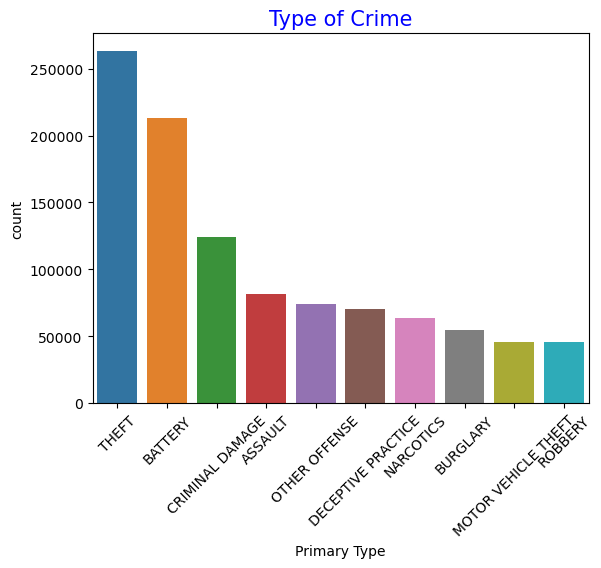

In [118]:
sns.countplot(data=data_top_10, x='Primary Type')
plt.title('Type of Crime',color = 'blue',fontsize=15)
plt.xticks(rotation=45)

In [32]:
# Groupby

# Creating our main dataset
crimes = data_top_10.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
crimes = crimes.sort_values(by=['District'], ascending=False)
crimes.head()

,Month,Day,District,Hour,Primary Type
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


In [33]:
# Renaming the variable
crimes_count=crimes.rename(index=str, columns={"Primary Type":"Crime_Count"})
crimes_count.head()

,Month,Day,District,Hour,Crime_Count
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


# Storing the preprocessed data into database
#### Dataframes are - crimes_count, crimes, data_top_10, main _data

In [34]:
print(crimes.columns)
print("############################")
print(crimes_count.columns)
print("############################")
print(data_top_10.columns)
print("############################")
print(main_data.columns)

Index(['Month', 'Day', 'District', 'Hour', 'Primary Type'], dtype='object')
############################
Index(['Month', 'Day', 'District', 'Hour', 'Crime_Count'], dtype='object')
############################
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour'],
      dtype='object')
############################
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour'],
      dtype='object')


In [82]:
#create a connection object

connection = psg.connect(database="Crimes",user="postgres",password="Harsh@2805")

#create a cursor

cursor = connection.cursor()

#creating table

#creating table
cursor.execute("DROP TABLE IF EXISTS Top_10_Crimes")
cursor.execute("create table Top_10_Crimes (Month int, Day int, District float, Hour int, \"Primary Type\" varchar)")
print("Table Created !")
connection.commit()

Table Created !


In [83]:
#create a connection object

connection = psg.connect(database="Crimes",user="postgres",password="Harsh@2805")

#create a cursor

cursor = connection.cursor()

In [84]:
# inserting the values

for i in crimes.index:
    vals=[crimes.at[i,col] for col in list(crimes.columns)]
    q1="insert into Top_10_Crimes values('%s','%s','%f','%s','%s')"%(vals[0],vals[1],vals[2],vals[3],vals[4])
    cursor.execute(q1)

In [85]:
connection.commit()

In [86]:
#creating table

cursor.execute("DROP TABLE IF EXISTS Top_10_Crime_Count")
cursor.execute("create table Top_10_Crime_Count (Month int, Day int, District float, Hour int, \"Primary Type\" varchar)")
print("Table Created !")
connection.commit()

Table Created !


In [87]:
# inserting the values

for i in crimes_count.index:
    vals=[crimes_count.at[i,col] for col in list(crimes_count.columns)]
    q1="insert into Top_10_Crime_Count values('%s','%s','%f','%s','%s')"%(vals[0],vals[1],vals[2],vals[3],vals[4])
    cursor.execute(q1)

In [88]:
connection.commit()

# EDA

In [35]:
print(crimes_count.head())
crimes_count.shape

       Month  Day  District  Hour  Crime_Count
16369      5    2      31.0     9            1
2113       1    3      31.0    10            1
12673      4    2      31.0    10            1
1584       1    2      31.0    16            1
1583       1    2      31.0    13            1


(44361, 5)

In [36]:
# Viewing the maximum and minmum crime counts
print("Highest Crime Count at any district at any time point:", crimes_count["Crime_Count"].max())
print("Lowest Crime Count at any district at any time point:", crimes_count["Crime_Count"].min())

Highest Crime Count at any district at any time point: 93
Lowest Crime Count at any district at any time point: 1


In [183]:
print("Average no. of crimes per ditrict per time point :",round(crimes_count['Crime_Count'].sum()/crimes_count.shape[0], 2))

Average no. of crimes per ditrict per time point : 23.37


In [186]:
crimes_count.describe()

,Month,Day,Hour,District,Crime_Count,Alarm
count,44361.000000,44361.000000,44361.000000,44361.000000,44361.000000,44361.000000
mean,6.499628,3.000293,11.502581,12.190190,23.367102,0.928383
std,3.451631,1.999859,6.920862,7.151551,12.531541,0.696077
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,4.000000,1.000000,6.000000,6.000000,13.000000,0.000000
50%,7.000000,3.000000,12.000000,12.000000,22.000000,1.000000
75%,9.000000,5.000000,18.000000,18.000000,32.000000,1.000000
max,12.000000,6.000000,23.000000,31.000000,93.000000,2.000000


In [187]:
crimes_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44361 entries, 16369 to 22180
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        44361 non-null  int64  
 1   Day          44361 non-null  int64  
 2   Hour         44361 non-null  int64  
 3   District     44361 non-null  float64
 4   Crime_Count  44361 non-null  int64  
 5   Alarm        44361 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.4+ MB


In [38]:
# Inspecting our own lower and upper bounds to make a target variable "Alarm"

lower = np.mean(crimes_count['Crime_Count'])-0.75*np.std(crimes_count['Crime_Count'])
higher = np.mean(crimes_count['Crime_Count'])+0.75*np.std(crimes_count['Crime_Count'])
print(lower, higher)

13.96855215504785 32.765651311961456


Text(0.5, 1.0, 'Crime Count Distribution')

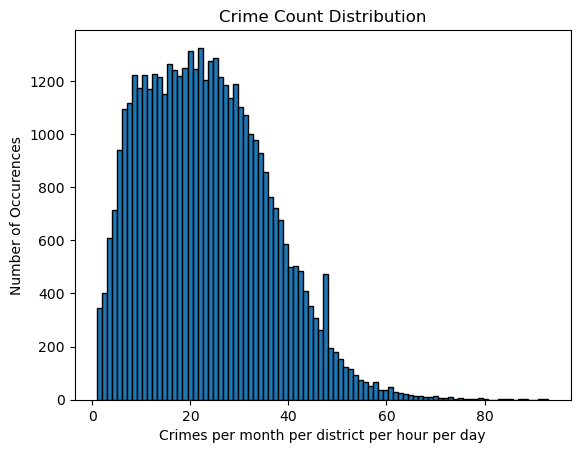

In [39]:
# Crime Count Distribution plot (We need to be using this plot in order to define our target variable "Alarm")

plt.hist(x='Crime_Count', data=crimes_count,bins=90,linewidth=1,edgecolor='black')
plt.title("Distribution of Crimes in Chicago",fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")

### 0-14 : Low Crime Rate
### 15-33 : Medium Crime Rate
### 34 and above : High Crime Rate

In [40]:
# Defining target variable

def crime_rate_assign(x):
    if(x<=14):
        return 0
    elif(x>14 and x<=33):
        return 1
    else:
        return 2
crimes_count['Alarm'] = crimes_count['Crime_Count'].apply(crime_rate_assign)
crimes_count = crimes_count[['Month','Day','Hour','District','Crime_Count','Alarm']]    
crimes_count.head()

,Month,Day,Hour,District,Crime_Count,Alarm
16369,5,2,9,31.0,1,0
2113,1,3,10,31.0,1,0
12673,4,2,10,31.0,1,0
1584,1,2,16,31.0,1,0
1583,1,2,13,31.0,1,0


<AxesSubplot: >

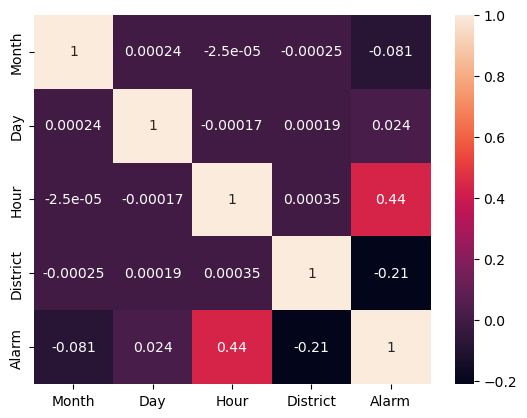

In [41]:
# Correlation heatmap

corr = crimes_count[['Month', 'Day', 'Hour', 'District', 'Alarm']]
sns.heatmap(corr.corr(), annot=True)

#### No strong correlation

In [120]:
crimes_count['Alarm'].value_counts()

1    22640
0    12449
2     9272
Name: Alarm, dtype: int64

In [121]:
print("Low Crime Rate Percentage:", round(crimes_count['Alarm'].value_counts()[0]/crimes_count['Alarm'].value_counts().sum()*100,2))
print("Medium Crime Rate Percentage:", round(crimes_count['Alarm'].value_counts()[1]/crimes_count['Alarm'].value_counts().sum()*100,2))
print("High Crime Rate Percentage:", round(crimes_count['Alarm'].value_counts()[2]/crimes_count['Alarm'].value_counts().sum()*100.2))

Low Crime Rate Percentage: 28.06
Medium Crime Rate Percentage: 51.04
High Crime Rate Percentage: 21


Text(0.5, 1.0, 'Alarm Types')

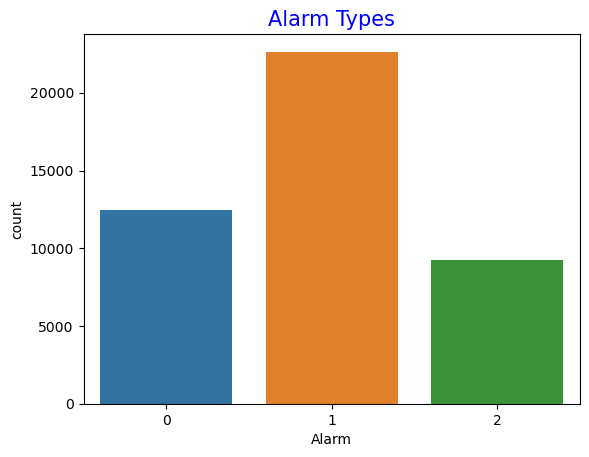

In [124]:
sns.countplot(data=crimes_count,x="Alarm")
plt.xlabel('Alarm')
plt.title('Alarm Types',color = 'blue', fontsize = 15)

# Pandas Profiling Report

In [181]:
from pandas_profiling import ProfileReport

In [182]:
profile = crimes_count.profile_report(title='Pandas Profiling Report')

profile.to_file(output_file="pandas_profiling1.html")

Summarize dataset:  54%|███████████████████▍                | 7/13 [00:00<00:02,  2.31it/s, Calculate auto correlation]C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 165.74it/s]


# Creating test data

#### Training data = 75% of the 2015 to 2019 crimes data

#### Testing data = 25% of the 2015 to 2019 crimes data & Crime records from 2012 to 2014

In [44]:
# Preparing the test Dataset of the Crime records from 2012 to 2014

test_files = ['crimes_2013.csv', 'crimes_2012.csv', 'crimes_2014.csv']
test_files = [paths+x for x in test_files]
test_2012_to_2014 = us.create_df(test_files)

Finished Loading Chicago Crime Dataset File for the year 2013.
Finished loading Chicago Crime Dataset file for the year 2012.


D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils\util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2014.
All data files loaded onto the Main Dataframe.




D:\Harsh\SIG\SEM 2\Mini Project ML and Python\utils\util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


In [45]:
# Drop missing values
test_2012_to_2014 = test_2012_to_2014.dropna()

# Using apply() of pandas to apply time_convert on every row of the Date column
test_2012_to_2014['Date'] = test_2012_to_2014['Date'].apply(time_convert)

# Feature Engineering of columns
test_2012_to_2014['Month'] = test_2012_to_2014['Date'].apply(month_col)
test_2012_to_2014['Day'] = test_2012_to_2014['Date'].apply(day_col)
test_2012_to_2014['Hour'] = test_2012_to_2014['Date'].apply(hour_col)

In [46]:
test_2012_to_2014.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,9566267,HX217110,2013-12-31 23:59:00,029XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,FACTORY/MANUFACTURING BUILDING,False,False,...,1152212.0,1919266.0,2013,02/10/2018 03:50:01 PM,41.934334,-87.716036,"(41.934334428, -87.716036114)",12,2,23
1,9448361,HX101619,2013-12-31 23:55:00,050XX W MONROE ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,1142672.0,1899189.0,2013,02/10/2018 03:50:01 PM,41.879424,-87.751596,"(41.879424049, -87.751596296)",12,2,23
2,9446989,HX100312,2013-12-31 23:50:00,022XX W JACKSON BLVD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,APARTMENT,False,True,...,1161633.0,1898661.0,2013,02/10/2018 03:50:01 PM,41.877601,-87.681989,"(41.87760139, -87.681988957)",12,2,23
3,9446913,HX100005,2013-12-31 23:50:00,087XX S PRINCETON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1175694.0,1846768.0,2013,02/10/2018 03:50:01 PM,41.734898,-87.631916,"(41.734897656, -87.631916024)",12,2,23
4,9446862,HX100007,2013-12-31 23:50:00,015XX E 57TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,1187279.0,1867502.0,2013,02/10/2018 03:50:01 PM,41.791527,-87.588817,"(41.791526694, -87.588816507)",12,2,23


In [47]:
test_2012_to_2014_top_10 = filter_top_10(test_2012_to_2014)
test_2012_to_2014_top_10_count = test_2012_to_2014_top_10.groupby(["Month", "Day", "District", "Hour"], as_index=False).agg({"Primary Type" : "count"})
test_2012_to_2014_top_10_count = test_2012_to_2014_top_10_count.sort_values(by=["District"], ascending=False)
test_2012_to_2014_top_10_count_name = test_2012_to_2014_top_10_count.rename(index=str, columns={"Primary Type" : "Crime_Count"})
test_2012_to_2014_top_10_count_name = test_2012_to_2014_top_10_count_name[["Month", "Day", "District", "Hour", "Crime_Count"]]
test_2012_to_2014_top_10_count_name['Alarm'] = test_2012_to_2014_top_10_count_name['Crime_Count'].apply(crime_rate_assign)
test_2012_to_2014_top_10_count_name = test_2012_to_2014_top_10_count_name[['Month','Day','Hour','District','Crime_Count','Alarm']]    
print(test_2012_to_2014_top_10_count_name.head())

C:\Users\harsh\AppData\Local\Temp\ipykernel_10536\534351760.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp, ignore_index=True)


       Month  Day  Hour  District  Crime_Count  Alarm
28465      8    4    20        31            1      0
24243      7    3    10        31            1      0
25299      7    5    17        31            1      0
32680      9    5    23        31            1      0
28464      8    4     4        31            1      0


In [48]:
print(test_2012_to_2014_top_10_count_name['Alarm'].value_counts())

1    22933
0    16979
2     4353
Name: Alarm, dtype: int64


# Storing test data into database

In [111]:
#create a connection object

connection = psg.connect(database="Crimes",user="postgres",password="Harsh@2805")

#create a cursor

cursor = connection.cursor()

#creating table

#creating table
cursor.execute("DROP TABLE IF EXISTS Test_2012_to_2014")
cursor.execute("create table Test_2012_to_2014 (Month int, Day int, District float, Hour int, \"Primary Type\" varchar)")
print("Table Created !")
connection.commit()

Table Created !


In [112]:
# inserting the values

for i in test_2012_to_2014_top_10_count_name.index:
    vals=[test_2012_to_2014_top_10_count_name.at[i,col] for col in list(test_2012_to_2014_top_10_count_name.columns)]
    q1="insert into Test_2012_to_2014 values('%s','%s','%f','%s','%s')"%(vals[0],vals[1],vals[2],vals[3],vals[4])
    cursor.execute(q1)

In [113]:
connection.commit()

# Model Building

### 1. Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
# Declaring X & Y

X = crimes_count[['Month', 'Day', 'Hour', 'District']]
y = crimes_count['Alarm']

In [59]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

In [60]:
model1 = DecisionTreeClassifier(random_state=42)
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [61]:
# Evaluation

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))

# Confusion Matrix for evaluating the model

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n---------------------------Confusion Matrix------------------------------------")
print(cm)

# Classification Report

print("\n----------------------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 71.85105040122622

---------------------------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2361   689     6
1                 732  4094   875
2                   1   819  1514

----------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      3056
           1       0.73      0.72      0.72      5701
           2       0.63      0.65      0.64      2334

    accuracy                           0.72     11091
   macro avg       0.71      0.71      0.71     11091
weighted avg       0.72      0.72      0.72     11091



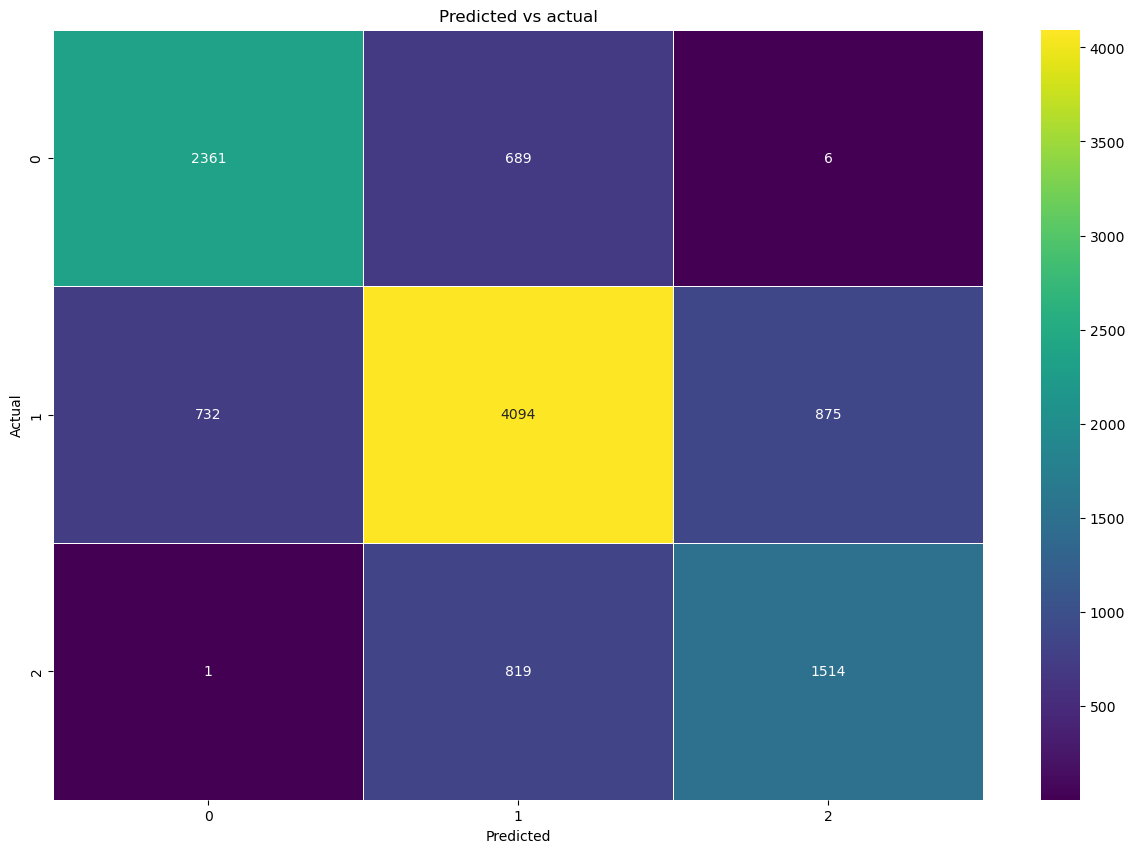

In [62]:
cm_nb = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Applying model on unseen data 

In [63]:
X = test_2012_to_2014_top_10_count_name.iloc[:,0:4].values
y = test_2012_to_2014_top_10_count_name.iloc[:,5].values

In [64]:
y_pred = model1.predict(X)

C:\Users\harsh\anaconda3\envs\advpy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [65]:
print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100))

# Confusion Matrix for evaluating the model

cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------------------Confusion Matrix------------------------------------")
print(cm)

# Classification Report

print("\n----------------Classification Report------------------------------------")
print(classification_report(y,y_pred))

Accuracy: 65.9188975488535

----------------------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                10908   5858   213
1                 1481  15301  6151
2                    5   1378  2970

----------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.64      0.74     16979
           1       0.68      0.67      0.67     22933
           2       0.32      0.68      0.43      4353

    accuracy                           0.66     44265
   macro avg       0.63      0.66      0.62     44265
weighted avg       0.72      0.66      0.68     44265



### 2. Random Forest

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [67]:
X = crimes_count.iloc[:,0:4].values
y = crimes_count.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

In [68]:
model2 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 101)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

In [69]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n---------------------------Confusion Matrix------------------------------------")
print(cm)


print("\n----------------------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 77.50428275178072 


---------------------------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2522   652     0
1                 513  4551   540
2                   2   788  1523

----------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3174
           1       0.76      0.81      0.78      5604
           2       0.74      0.66      0.70      2313

    accuracy                           0.78     11091
   macro avg       0.78      0.76      0.76     11091
weighted avg       0.78      0.78      0.77     11091



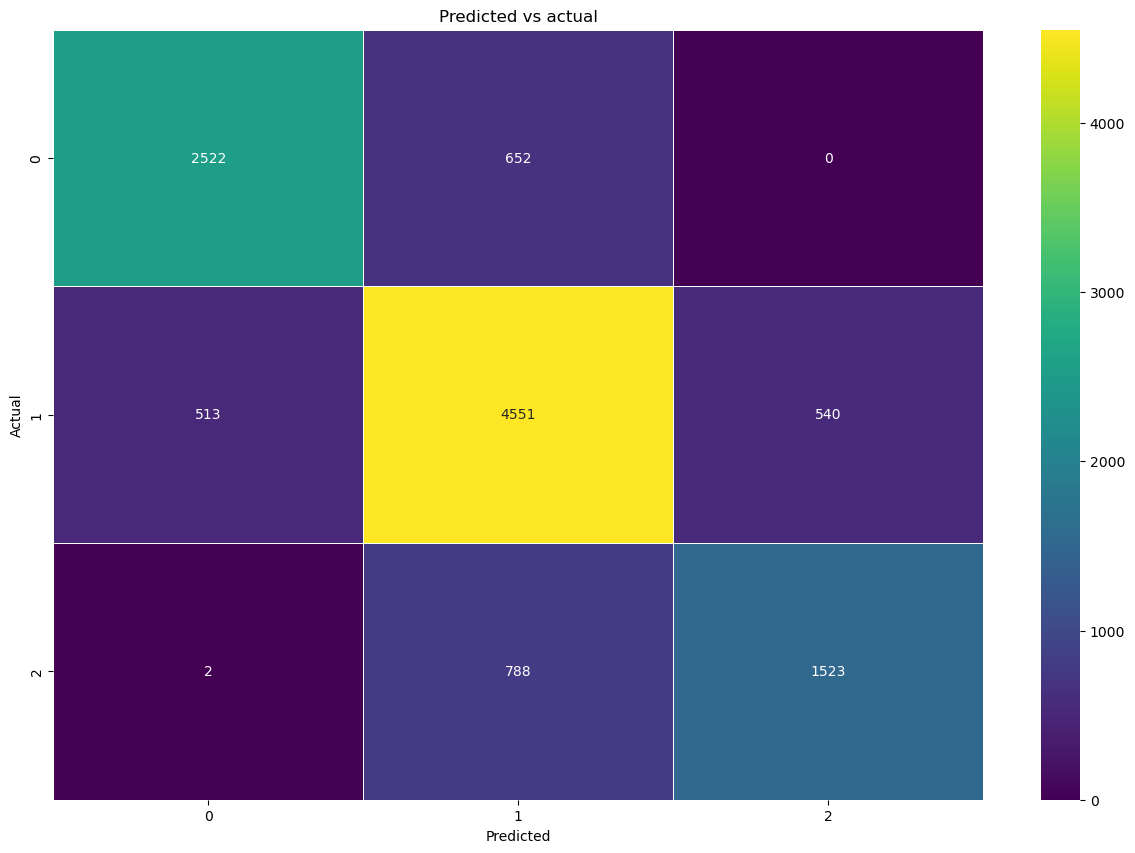

In [70]:
cm_nb = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Applying model on unseen data

In [71]:
X = test_2012_to_2014_top_10_count_name.iloc[:,0:4].values
y = test_2012_to_2014_top_10_count_name.iloc[:,5].values

In [72]:
y_pred = model2.predict(X)

In [73]:
print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n--------------------------Confusion Matrix------------------------------------")
print(cm)

print("\n---------------------Classification Report------------------------------------")
print(classification_report(y,y_pred))

Accuracy: 67.35795775443353 


--------------------------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                10954   5833   192
1                 1263  15851  5819
2                    1   1341  3011

---------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.65      0.75     16979
           1       0.69      0.69      0.69     22933
           2       0.33      0.69      0.45      4353

    accuracy                           0.67     44265
   macro avg       0.64      0.68      0.63     44265
weighted avg       0.73      0.67      0.69     44265



### 3. Naive Baye's

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
X = crimes_count.iloc[:,0:4].values
y = crimes_count.iloc[:,5].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

In [77]:
#Create a Gaussian Classifier

model3 = GaussianNB()

#Train the model using the training sets

model3.fit(X_train, y_train)

#Predict the response for test dataset

y_pred = model3.predict(X_test)

In [78]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n------------------------------Confusion Matrix------------------------------------")
print(cm)

print("\n-------------------------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 57.80362456045442 


------------------------------Confusion Matrix------------------------------------
Predicted Alarm     0     1    2
Actual Alarm                    
0                1875  1295    4
1                1078  4390  136
2                 151  2016  146

-------------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      3174
           1       0.57      0.78      0.66      5604
           2       0.51      0.06      0.11      2313

    accuracy                           0.58     11091
   macro avg       0.56      0.48      0.46     11091
weighted avg       0.57      0.58      0.53     11091



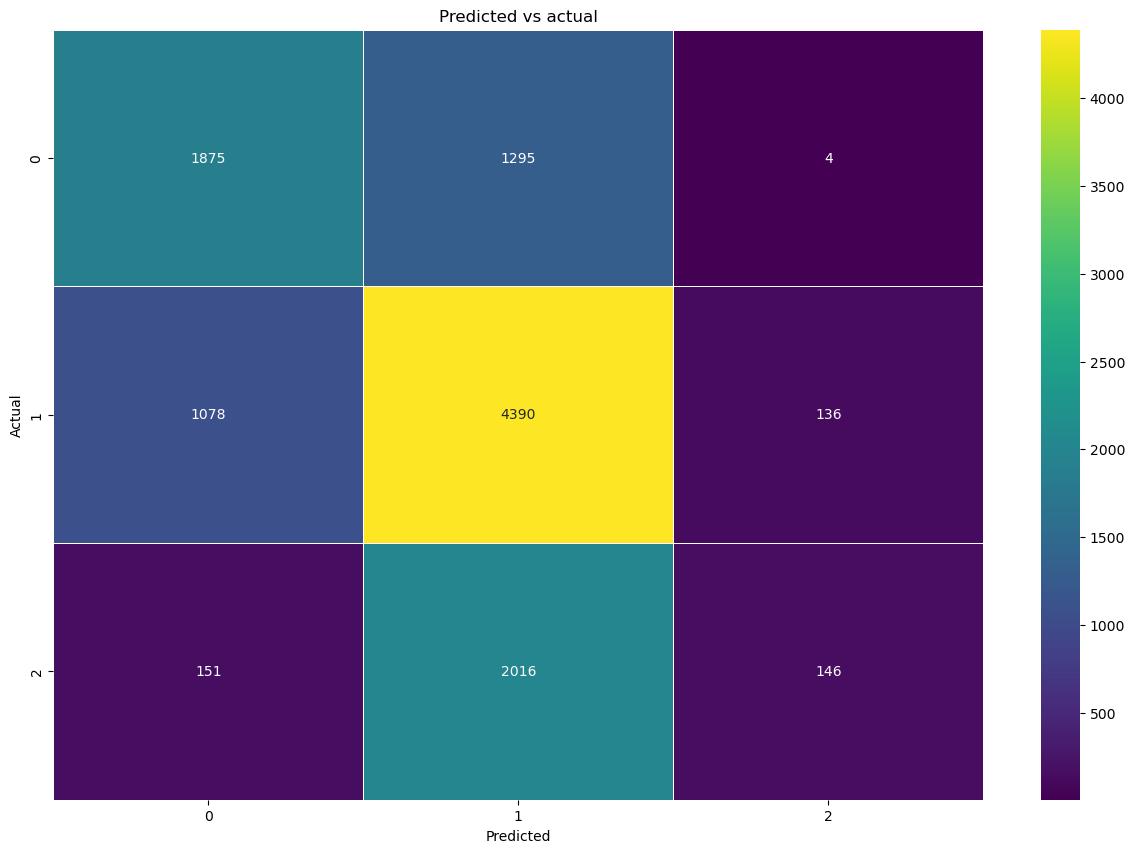

In [79]:
cm_nb = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Applying model n unseen data

In [80]:
X = test_2012_to_2014_top_10_count_name.iloc[:,0:4].values
y = test_2012_to_2014_top_10_count_name.iloc[:,5].values

In [81]:
y_pred = model3.predict(X)

In [82]:
print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n--------------------------Confusion Matrix------------------------------------")
print(cm)

print("\n---------------------Classification Report------------------------------------")
print(classification_report(y,y_pred))

Accuracy: 62.123573929741326 


--------------------------Confusion Matrix------------------------------------
Predicted Alarm     0      1    2
Actual Alarm                     
0                8571   8279  129
1                3267  18756  910
2                 338   3843  172

---------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.50      0.59     16979
           1       0.61      0.82      0.70     22933
           2       0.14      0.04      0.06      4353

    accuracy                           0.62     44265
   macro avg       0.48      0.45      0.45     44265
weighted avg       0.60      0.62      0.59     44265



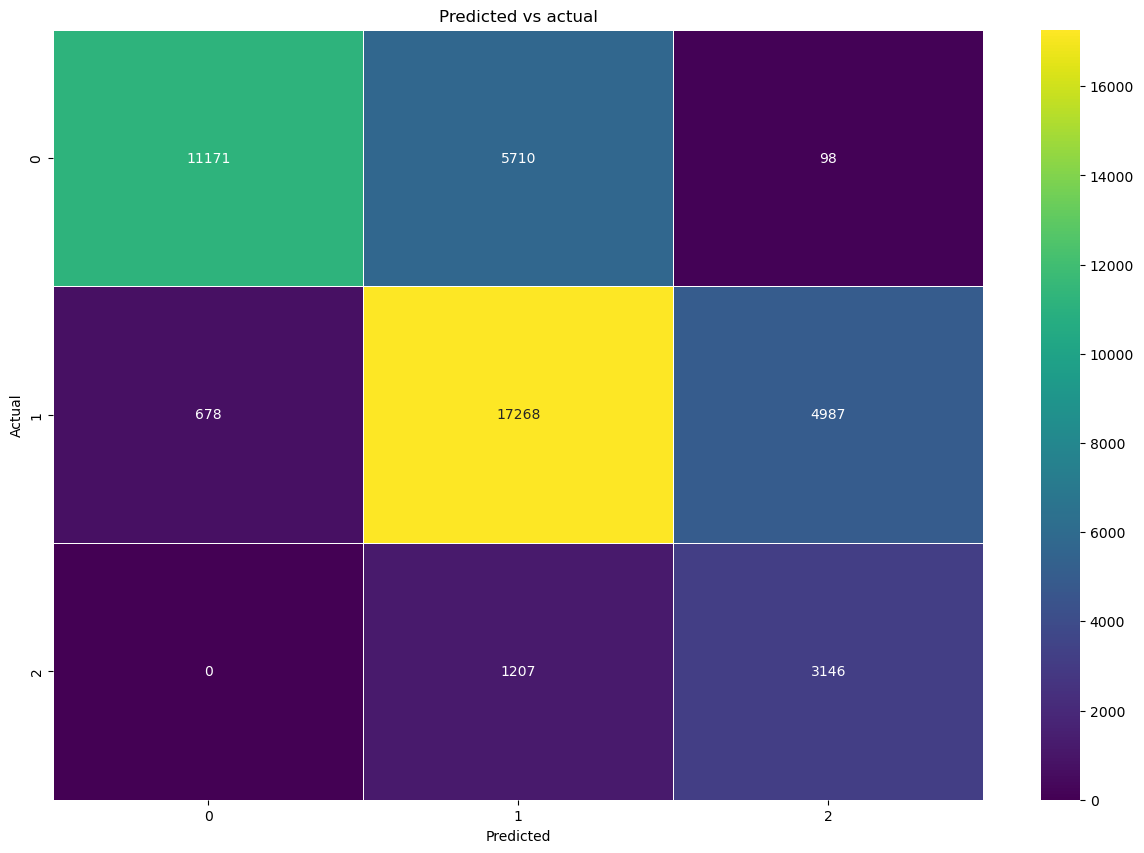

In [188]:
cm_nb = confusion_matrix(y,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### 4. KNN classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [84]:
X = crimes_count.iloc[:,0:4].values
y = crimes_count.iloc[:,5].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

Text(0.5, 1.0, 'Choosing k value for KNN Algorithm')

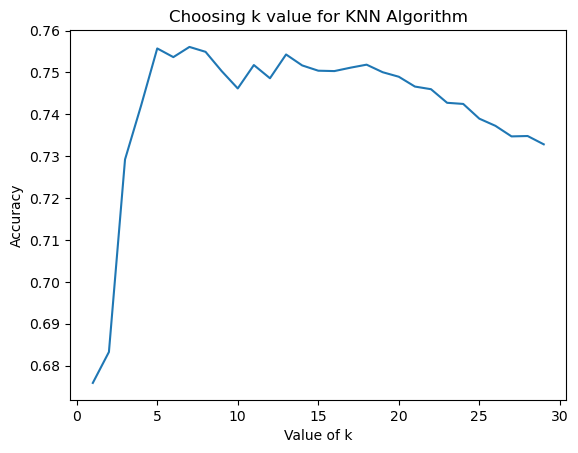

In [86]:
# To find out the optimum value of K which gives good accuracy\

k_vals = range(1,30)
acc = []
for k in k_vals:
    model4 = KNeighborsClassifier(n_neighbors = k)
    model4.fit(X_train, y_train)
    y_pred = model4.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
# plot the graph
plt.plot(k_vals,acc)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Choosing k value for KNN Algorithm')

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [88]:
X = crimes_count.iloc[:,0:4].values
y = crimes_count.iloc[:,5].values

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

In [90]:
model4_1 = KNeighborsClassifier(n_neighbors = 5)
model4_1.fit(X_train, y_train)
y_pred = model4_1.predict(X_test)

In [91]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n------------------------Confusion Matrix------------------------------------")
print(cm)

print("\n-------------------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 75.57479037057074 


------------------------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2536   638     0
1                 591  4462   551
2                  14   915  1384

-------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3174
           1       0.74      0.80      0.77      5604
           2       0.72      0.60      0.65      2313

    accuracy                           0.76     11091
   macro avg       0.75      0.73      0.74     11091
weighted avg       0.76      0.76      0.75     11091



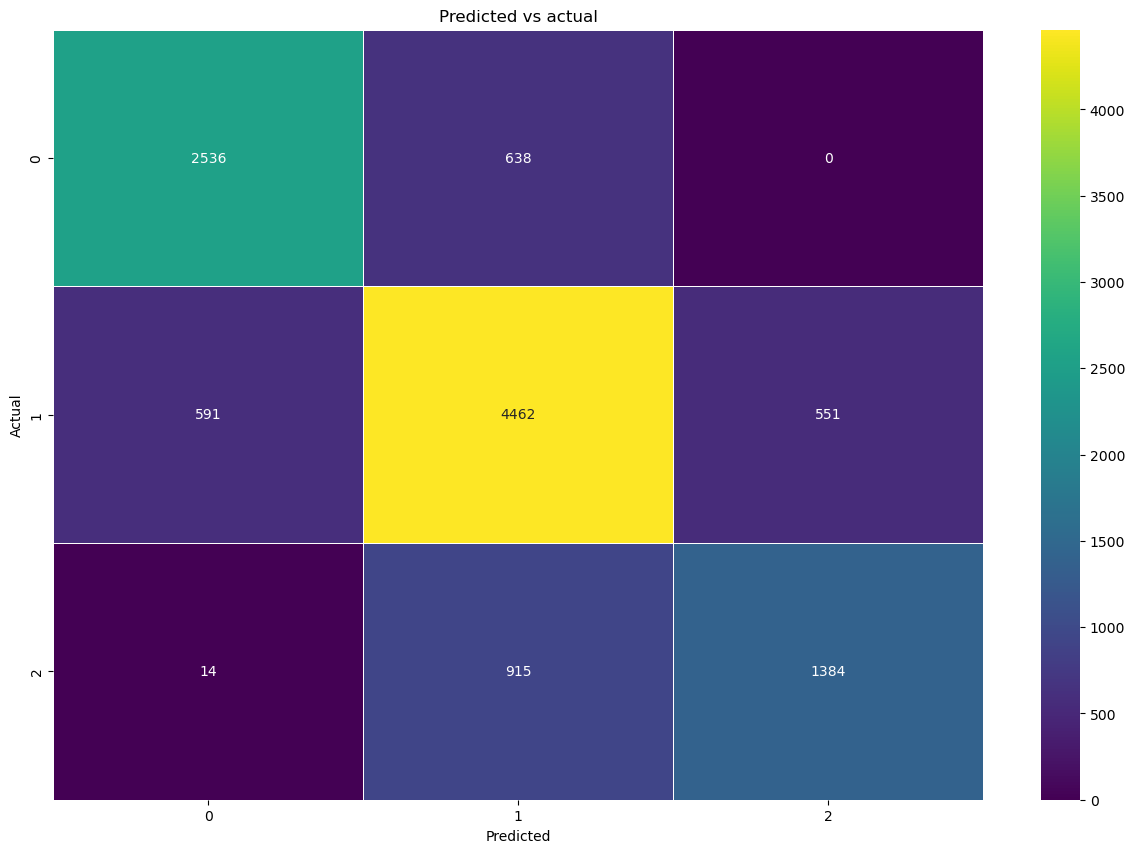

In [92]:
cm_nb = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Applying on unseen data

In [93]:
X = test_2012_to_2014_top_10_count_name.iloc[:,0:4].values
y = test_2012_to_2014_top_10_count_name.iloc[:,5].values

In [94]:
y_pred = model4_1.predict(X)

In [95]:
print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n------------------------------Confusion Matrix------------------------------------")
print(cm)

print("\n-------------------------Classification Report------------------------------------")
print(classification_report(y,y_pred))

Accuracy: 69.69388907714898 


------------------------------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                11111   5750   118
1                 1109  16861  4963
2                    9   1466  2878

-------------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.65      0.76     16979
           1       0.70      0.74      0.72     22933
           2       0.36      0.66      0.47      4353

    accuracy                           0.70     44265
   macro avg       0.66      0.68      0.65     44265
weighted avg       0.75      0.70      0.71     44265



### 5. Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [126]:
X = crimes_count.iloc[:,0:4].values
y = crimes_count.iloc[:,5].values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

In [128]:
model6 = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [129]:
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)

In [130]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 55.576593634478414 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1    2
Actual Alarm                    
0                1658  1504   12
1                 998  4374  232
2                 146  2035  132

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      3174
           1       0.55      0.78      0.65      5604
           2       0.35      0.06      0.10      2313

    accuracy                           0.56     11091
   macro avg       0.50      0.45      0.43     11091
weighted avg       0.52      0.56      0.51     11091



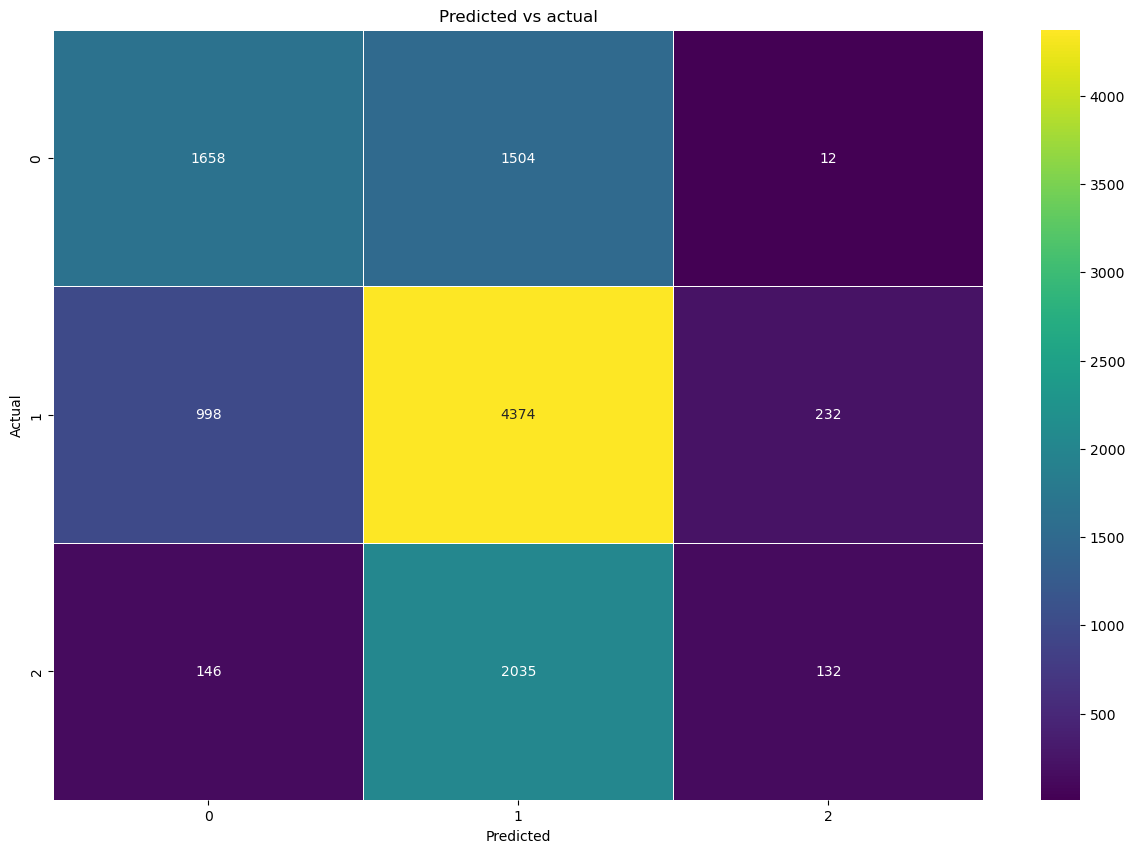

In [131]:
cm_nb = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Applying on unseen dataset

In [132]:
X = test_2012_to_2014_top_10_count_name.iloc[:,0:4].values
y = test_2012_to_2014_top_10_count_name.iloc[:,5].values

y_pred = model6.predict(X)

In [133]:
print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

Accuracy: 59.55269400203321 


----------Confusion Matrix------------------------------------
Predicted Alarm     0      1     2
Actual Alarm                      
0                7501   9203   275
1                3109  18684  1140
2                 336   3841   176

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.44      0.54     16979
           1       0.59      0.81      0.68     22933
           2       0.11      0.04      0.06      4353

    accuracy                           0.60     44265
   macro avg       0.46      0.43      0.43     44265
weighted avg       0.58      0.60      0.57     44265



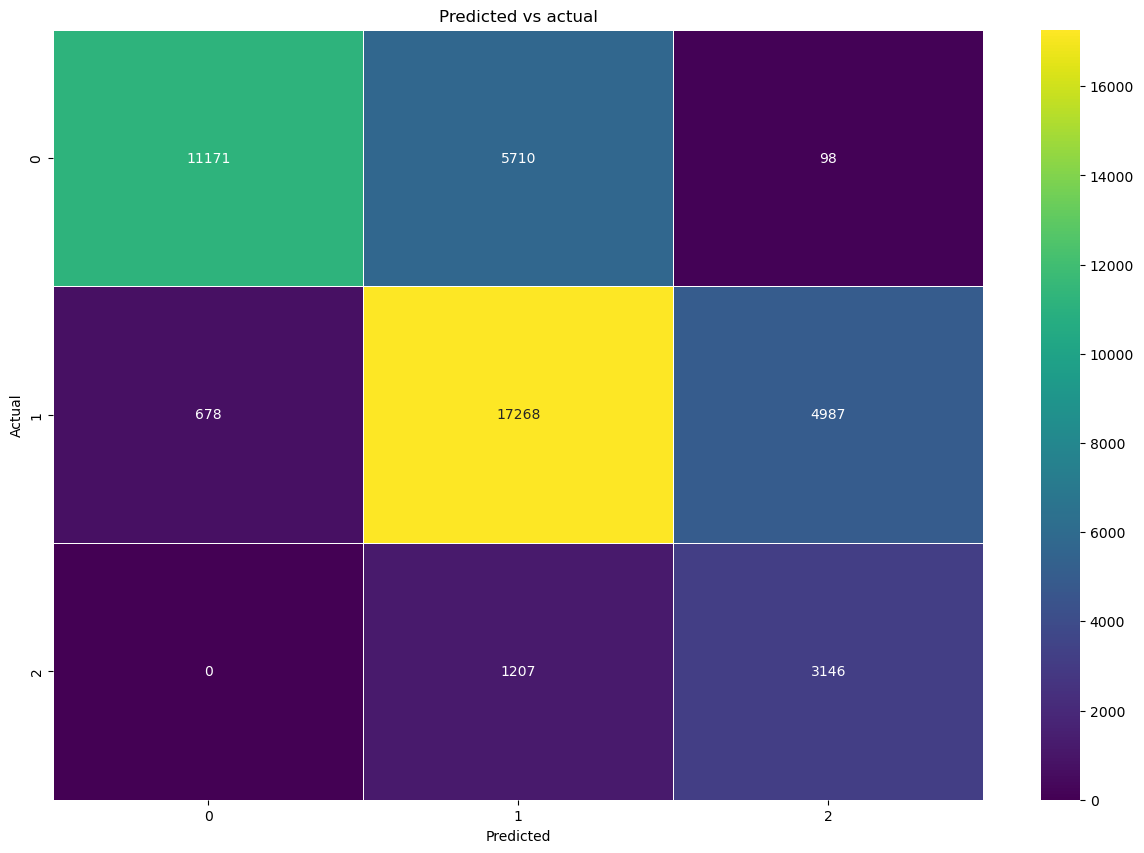

In [189]:
cm_nb = confusion_matrix(y,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### 6. Gradient Boosting Tree

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [135]:
X = crimes_count.iloc[:,0:4].values
y = crimes_count.iloc[:,5].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33270, 4), (11091, 4), (33270,), (11091,))

In [137]:
model7 = GradientBoostingClassifier(n_estimators=1000)
model7.fit(X_train, y_train)
y_pred = model7.predict(X_test)

In [138]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------------------------Confusion Matrix------------------------------------")
print(cm)

print("\n-----------------------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

Accuracy: 79.8395095122171 


----------------------------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2580   594     0
1                 419  4712   473
2                   1   749  1563

-----------------------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      3174
           1       0.78      0.84      0.81      5604
           2       0.77      0.68      0.72      2313

    accuracy                           0.80     11091
   macro avg       0.80      0.78      0.79     11091
weighted avg       0.80      0.80      0.80     11091



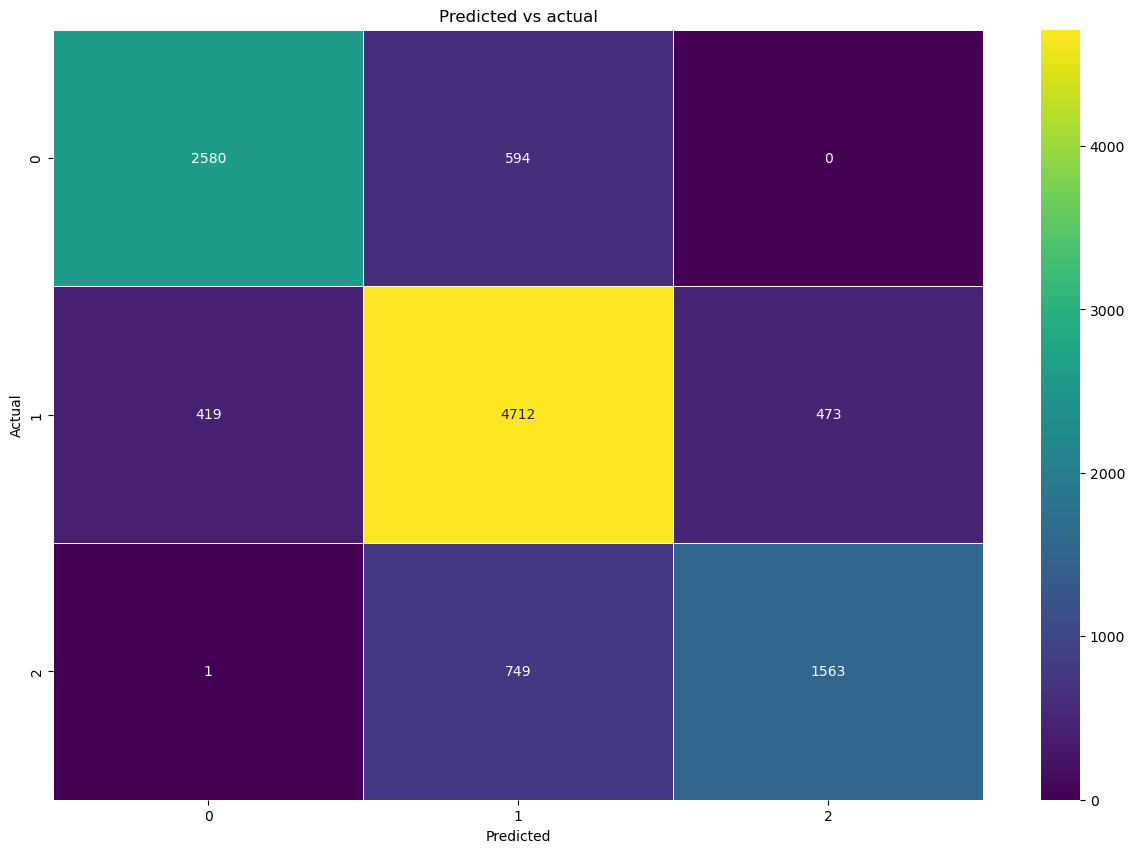

In [139]:
cm_nb = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Applying on unseen data

In [140]:
X = test_2012_to_2014_top_10_count_name.iloc[:,0:4].values
y = test_2012_to_2014_top_10_count_name.iloc[:,5].values

y_pred = model7.predict(X)

In [141]:
print("Accuracy:",(metrics.accuracy_score(y, y_pred)*100),"\n")

cm = pd.crosstab(y, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

print("\n----------Classification Report------------------------------------")
print(classification_report(y,y_pred))

Accuracy: 71.35434316051055 


----------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                11171   5710    98
1                  678  17268  4987
2                    0   1207  3146

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     16979
           1       0.71      0.75      0.73     22933
           2       0.38      0.72      0.50      4353

    accuracy                           0.71     44265
   macro avg       0.68      0.71      0.67     44265
weighted avg       0.77      0.71      0.73     44265



In [142]:
acc = {"x":["Decision Tree","Random Forest","Naive Bayes","KNN","SVM","Logistic Regression","Gradient Boosting Tree"],"y":[71.85,77.50,62.12,75.57,63.82,59.55,79.83]}

accuracy=pd.DataFrame(acc)
accuracy

,x,y
0,Decision Tree,71.85
1,Random Forest,77.50
2,Naive Bayes,62.12
3,KNN,75.57
4,SVM,63.82
5,Logistic Regression,59.55
6,Gradient Boosting Tree,79.83


<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='y', ylabel='x'>

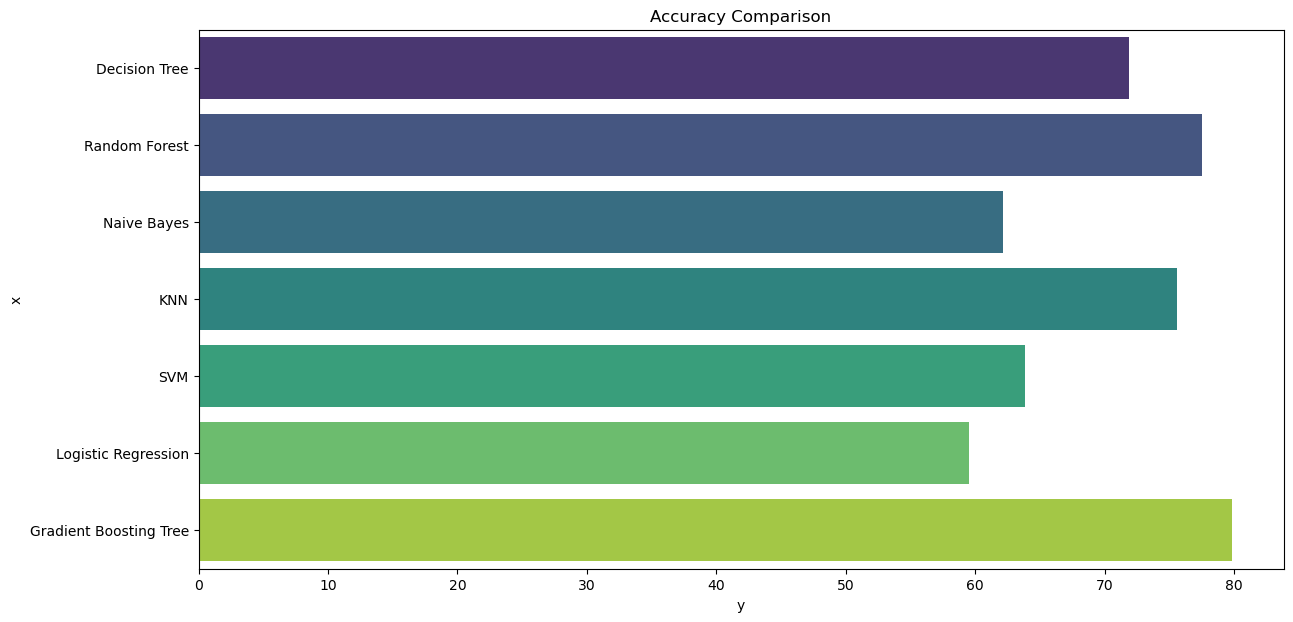

In [143]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = accuracy["y"],y = accuracy["x"],palette='viridis')

# Spatial Representation

In [144]:
data_top_10.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'Hour'],
      dtype='object')

In [145]:
data= data_top_10.loc[:,['Year','Month','Day','Hour','District','Primary Type','Latitude', 'Longitude','Location']]
data.head()

,Year,Month,Day,Hour,District,Primary Type,Latitude,Longitude,Location
0,2015,12,4,23,24.0,THEFT,42.016804,-87.690709,"(42.016804165, -87.690708662)"
1,2015,12,4,23,1.0,THEFT,41.888165,-87.622937,"(41.888165132, -87.622937212)"
2,2015,12,4,23,1.0,THEFT,41.888165,-87.622937,"(41.888165132, -87.622937212)"
3,2015,12,4,23,12.0,THEFT,41.860664,-87.650847,"(41.860664155, -87.650847428)"
4,2015,12,4,23,19.0,THEFT,41.945467,-87.663974,"(41.945466899, -87.663974392)"


In [146]:
data1 = data.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
data1 = data1.sort_values(by=['District'], ascending=False)
data1.head()

,Month,Day,District,Hour,Primary Type
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


In [147]:
lat_long=data["District"].unique()
lat_long=lat_long.tolist()
lat_long

[24.0,
 1.0,
 12.0,
 19.0,
 6.0,
 8.0,
 10.0,
 15.0,
 2.0,
 11.0,
 7.0,
 18.0,
 4.0,
 14.0,
 5.0,
 17.0,
 3.0,
 25.0,
 9.0,
 20.0,
 22.0,
 16.0,
 31.0]

In [148]:
a=data[data["District"]==24.0]
print(a["Latitude"].mean())
print(a["Longitude"].mean())

42.00612014580467
-87.67843100832572


In [149]:
lat=[]
long=[]
for i in lat_long:
    a=data[data["District"]==i]
    lat.append(a["Latitude"].mean())
    long.append(a["Longitude"].mean())

In [150]:
print(lat)
print(long)

[42.00612014580467, 41.874844881382394, 41.8811468993117, 41.946946162979266, 41.74566461329821, 41.77765082338235, 41.85392065160516, 41.885718710764905, 41.809598555847316, 41.88187648942895, 41.77532664696245, 41.901678506775355, 41.734561610211216, 41.91685506226188, 41.68782204028016, 41.960839965823254, 41.77104143112991, 41.9193203685829, 41.816328149566225, 41.978512206235926, 41.709025300420606, 41.965693641454145, 41.92541264492308]
[-87.67843100832572, -87.62883539743628, -87.67031731626791, -87.65908517682524, -87.63187329282196, -87.71592218531377, -87.71295197347095, -87.75838113568602, -87.61140662623968, -87.71939087261443, -87.65360699352563, -87.63385830285937, -87.56405724976598, -87.69151348742545, -87.62175868493695, -87.7209903866449, -87.59632976589833, -87.75326430858489, -87.66511648672756, -87.67237286775698, -87.65883845750795, -87.79776072248494, -87.79710471353845]


In [151]:
data1["Latitude"]=np.nan
data1["Longitude"]=np.nan
data1.head()

,Month,Day,District,Hour,Primary Type,Latitude,Longitude
16369,5,2,31.0,9,1,NaN,NaN
2113,1,3,31.0,10,1,NaN,NaN
12673,4,2,31.0,10,1,NaN,NaN
1584,1,2,31.0,16,1,NaN,NaN
1583,1,2,31.0,13,1,NaN,NaN


In [152]:
# Renaming the variable
data2=data1.rename(index=str, columns={"Primary Type":"Crime_Count"})
data2.head()

,Month,Day,District,Hour,Crime_Count,Latitude,Longitude
16369,5,2,31.0,9,1,NaN,NaN
2113,1,3,31.0,10,1,NaN,NaN
12673,4,2,31.0,10,1,NaN,NaN
1584,1,2,31.0,16,1,NaN,NaN
1583,1,2,31.0,13,1,NaN,NaN


In [153]:
def crime_rate_assign(x):
    if(x<=14):
        return 0
    elif(x>14 and x<=33):
        return 1
    else:
        return 2
data2['Alarm'] = data2['Crime_Count'].apply(crime_rate_assign)
data2 = data2[['Month','Day','Hour','District','Crime_Count','Latitude','Longitude','Alarm']]    
data2.head()

,Month,Day,Hour,District,Crime_Count,Latitude,Longitude,Alarm
16369,5,2,9,31.0,1,NaN,NaN,0
2113,1,3,10,31.0,1,NaN,NaN,0
12673,4,2,10,31.0,1,NaN,NaN,0
1584,1,2,16,31.0,1,NaN,NaN,0
1583,1,2,13,31.0,1,NaN,NaN,0


In [154]:
print(lat_long)
print("\n**********************************\n")
print(lat)
print("\n**********************************\n")
print(long)

[24.0, 1.0, 12.0, 19.0, 6.0, 8.0, 10.0, 15.0, 2.0, 11.0, 7.0, 18.0, 4.0, 14.0, 5.0, 17.0, 3.0, 25.0, 9.0, 20.0, 22.0, 16.0, 31.0]

**********************************

[42.00612014580467, 41.874844881382394, 41.8811468993117, 41.946946162979266, 41.74566461329821, 41.77765082338235, 41.85392065160516, 41.885718710764905, 41.809598555847316, 41.88187648942895, 41.77532664696245, 41.901678506775355, 41.734561610211216, 41.91685506226188, 41.68782204028016, 41.960839965823254, 41.77104143112991, 41.9193203685829, 41.816328149566225, 41.978512206235926, 41.709025300420606, 41.965693641454145, 41.92541264492308]

**********************************

[-87.67843100832572, -87.62883539743628, -87.67031731626791, -87.65908517682524, -87.63187329282196, -87.71592218531377, -87.71295197347095, -87.75838113568602, -87.61140662623968, -87.71939087261443, -87.65360699352563, -87.63385830285937, -87.56405724976598, -87.69151348742545, -87.62175868493695, -87.7209903866449, -87.59632976589833, -87.75326

In [155]:
lat_long[0]

24.0

In [156]:
def lati(x):
    for i in range(0,24):
        if x==lat_long[i]:
            return lat[i]

        
def longi(x):
    for i in range(0,24):
        if x==lat_long[i]:
            return long[i]

In [157]:
data2=data2.drop(["Latitude","Longitude"],axis=1)
data2.head()

,Month,Day,Hour,District,Crime_Count,Alarm
16369,5,2,9,31.0,1,0
2113,1,3,10,31.0,1,0
12673,4,2,10,31.0,1,0
1584,1,2,16,31.0,1,0
1583,1,2,13,31.0,1,0


In [158]:
data2["Latitude"]=data2["District"].apply(lati)
data2["Longitude"]=data2["District"].apply(longi)

In [159]:
data2.head()

,Month,Day,Hour,District,Crime_Count,Alarm,Latitude,Longitude
16369,5,2,9,31.0,1,0,41.925413,-87.797105
2113,1,3,10,31.0,1,0,41.925413,-87.797105
12673,4,2,10,31.0,1,0,41.925413,-87.797105
1584,1,2,16,31.0,1,0,41.925413,-87.797105
1583,1,2,13,31.0,1,0,41.925413,-87.797105


In [160]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data2.Longitude, data2.Latitude)]
df = data2.drop(['Latitude', 'Longitude'], axis=1)
gdf = gpd.GeoDataFrame(data2, crs="EPSG:4326", geometry=geometry)
gdf.head()

,Month,Day,Hour,District,Crime_Count,Alarm,Latitude,Longitude,geometry
16369,5,2,9,31.0,1,0,41.925413,-87.797105,POINT (-87.79710 41.92541)
2113,1,3,10,31.0,1,0,41.925413,-87.797105,POINT (-87.79710 41.92541)
12673,4,2,10,31.0,1,0,41.925413,-87.797105,POINT (-87.79710 41.92541)
1584,1,2,16,31.0,1,0,41.925413,-87.797105,POINT (-87.79710 41.92541)
1583,1,2,13,31.0,1,0,41.925413,-87.797105,POINT (-87.79710 41.92541)


<AxesSubplot: >

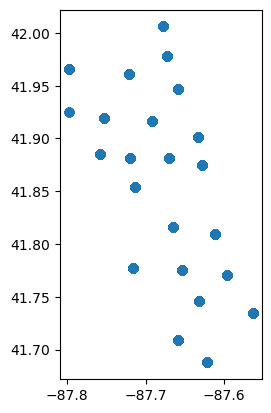

In [161]:
gdf.plot()

In [162]:
data2[data2["Alarm"]==2]

,Month,Day,Hour,District,Crime_Count,Alarm,Latitude,Longitude,geometry
10021,3,4,11,25.0,34,2,41.919320,-87.753264,POINT (-87.75326 41.91932)
8974,3,2,22,25.0,40,2,41.919320,-87.753264,POINT (-87.75326 41.91932)
10031,3,4,21,25.0,40,2,41.919320,-87.753264,POINT (-87.75326 41.91932)
39080,11,3,21,25.0,36,2,41.919320,-87.753264,POINT (-87.75326 41.91932)
39079,11,3,20,25.0,37,2,41.919320,-87.753264,POINT (-87.75326 41.91932)
...,...,...,...,...,...,...,...,...,...
28008,8,4,16,1.0,59,2,41.874845,-87.628835,POINT (-87.62884 41.87484)
28009,8,4,17,1.0,70,2,41.874845,-87.628835,POINT (-87.62884 41.87484)
28011,8,4,19,1.0,46,2,41.874845,-87.628835,POINT (-87.62884 41.87484)
28012,8,4,20,1.0,49,2,41.874845,-87.628835,POINT (-87.62884 41.87484)


In [163]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print(world)

       pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    M

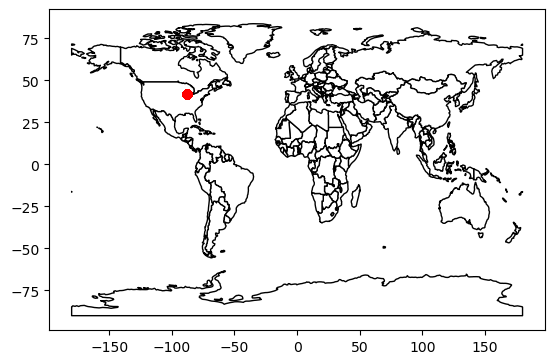

In [164]:
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red');

In [165]:
ch=gpd.read_file(r"C:\Users\harsh\Downloads\CH\geo_export_4de20ab1-a453-408e-aa0f-a0a577424d7d.shp")

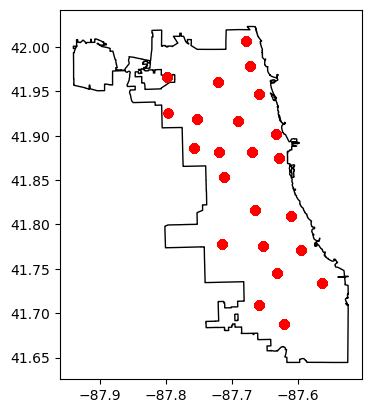

In [166]:
base = ch.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red');

In [167]:
gdf_very_high_CR=gdf[gdf["Crime_Count"]>70]
gdf_very_high_CR

,Month,Day,Hour,District,Crime_Count,Alarm,Latitude,Longitude,geometry
11475,4,0,2,18.0,72,2,41.901679,-87.633858,POINT (-87.63386 41.90168)
7776,3,0,0,18.0,73,2,41.901679,-87.633858,POINT (-87.63386 41.90168)
1986,1,3,17,18.0,73,2,41.901679,-87.633858,POINT (-87.63386 41.90168)
13988,4,5,19,11.0,79,2,41.881876,-87.719391,POINT (-87.71939 41.88188)
13987,4,5,18,11.0,84,2,41.881876,-87.719391,POINT (-87.71939 41.88188)
13981,4,5,12,11.0,71,2,41.881876,-87.719391,POINT (-87.71939 41.88188)
14516,4,6,19,11.0,75,2,41.881876,-87.719391,POINT (-87.71939 41.88188)
9765,3,4,19,11.0,85,2,41.881876,-87.719391,POINT (-87.71939 41.88188)
2373,1,4,19,11.0,73,2,41.881876,-87.719391,POINT (-87.71939 41.88188)
13460,4,4,19,11.0,74,2,41.881876,-87.719391,POINT (-87.71939 41.88188)


<AxesSubplot: >

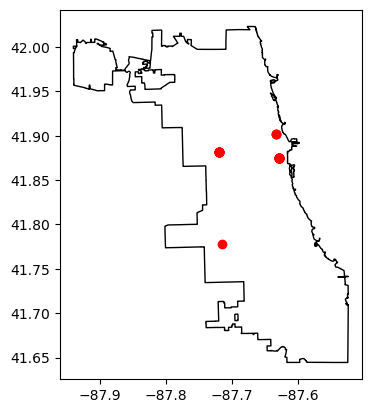

In [168]:
base = ch.plot(color='white', edgecolor='black')
gdf_very_high_CR.plot(ax=base, marker='o', color='red')